In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data=pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$query=SELECT%0A%20%20%60crash_date%60%2C%0A%20%20%60crash_time%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60zip_code%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60on_street_name%60%2C%0A%20%20%60off_street_name%60%2C%0A%20%20%60cross_street_name%60%2C%0A%20%20%60number_of_persons_injured%60%2C%0A%20%20%60number_of_persons_killed%60%2C%0A%20%20%60number_of_pedestrians_injured%60%2C%0A%20%20%60number_of_pedestrians_killed%60%2C%0A%20%20%60number_of_cyclist_injured%60%2C%0A%20%20%60number_of_cyclist_killed%60%2C%0A%20%20%60number_of_motorist_injured%60%2C%0A%20%20%60number_of_motorist_killed%60%2C%0A%20%20%60contributing_factor_vehicle_1%60%2C%0A%20%20%60contributing_factor_vehicle_2%60%2C%0A%20%20%60contributing_factor_vehicle_3%60%2C%0A%20%20%60contributing_factor_vehicle_4%60%2C%0A%20%20%60contributing_factor_vehicle_5%60%2C%0A%20%20%60collision_id%60%2C%0A%20%20%60vehicle_type_code1%60%2C%0A%20%20%60vehicle_type_code2%60%2C%0A%20%20%60vehicle_type_code_3%60%2C%0A%20%20%60vehicle_type_code_4%60%2C%0A%20%20%60vehicle_type_code_5%60")

In [6]:
data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"\n, \n(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"\n, \n(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_date                     1000 non-null   object 
 1   crash_time                     1000 non-null   object 
 2   borough                        633 non-null    object 
 3   zip_code                       632 non-null    float64
 4   latitude                       924 non-null    float64
 5   longitude                      924 non-null    float64
 6   location                       924 non-null    object 
 7   on_street_name                 742 non-null    object 
 8   off_street_name                451 non-null    object 
 9   cross_street_name              258 non-null    object 
 10  number_of_persons_injured      1000 non-null   int64  
 11  number_of_persons_killed       1000 non-null   int64  
 12  number_of_pedestrians_injured  1000 non-null   in

In [8]:
data.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [10]:
data.isna().sum()

crash_date                         0
crash_time                         0
borough                          367
zip_code                         368
latitude                          76
longitude                         76
location                          76
on_street_name                   258
off_street_name                  549
cross_street_name                742
number_of_persons_injured          0
number_of_persons_killed           0
number_of_pedestrians_injured      0
number_of_pedestrians_killed       0
number_of_cyclist_injured          0
number_of_cyclist_killed           0
number_of_motorist_injured         0
number_of_motorist_killed          0
contributing_factor_vehicle_1      3
contributing_factor_vehicle_2    230
contributing_factor_vehicle_3    909
contributing_factor_vehicle_4    973
contributing_factor_vehicle_5    994
collision_id                       0
vehicle_type_code1                14
vehicle_type_code2               345
vehicle_type_code_3              919
v

In [11]:
df=data[['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1', 'vehicle_type_code2']]

In [12]:
df.isna().sum()

crash_date                         0
crash_time                         0
borough                          367
zip_code                         368
latitude                          76
longitude                         76
location                          76
on_street_name                   258
number_of_persons_injured          0
number_of_persons_killed           0
number_of_pedestrians_injured      0
number_of_pedestrians_killed       0
number_of_cyclist_injured          0
number_of_cyclist_killed           0
number_of_motorist_injured         0
number_of_motorist_killed          0
contributing_factor_vehicle_1      3
contributing_factor_vehicle_2    230
collision_id                       0
vehicle_type_code1                14
vehicle_type_code2               345
dtype: int64

In [14]:
df[df['borough'].isna()]

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2,0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1,0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0,0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
5,2021-04-14T00:00:00.000,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4407458,Dump,Sedan
6,2021-12-14T00:00:00.000,17:05,NaN,NaN,40.709183,-73.956825,"\n, \n(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,0,0,0,0,0,Passing Too Closely,Unspecified,4486555,Sedan,Tractor Truck Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2021-04-14T00:00:00.000,12:00,NaN,NaN,40.593002,-74.159000,"\n, \n(40.593002, -74.159)",NaN,0,0,...,0,0,0,0,0,Passing Too Closely,Unspecified,4407494,Sedan,Box Truck
993,2021-04-14T00:00:00.000,17:30,NaN,NaN,40.754580,-73.999150,"\n, \n(40.75458, -73.99915)",WEST 34 STREET,0,0,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4407827,Box Truck,Pick-up Truck
994,2021-04-14T00:00:00.000,22:40,NaN,NaN,40.741394,-73.823030,"\n, \n(40.741394, -73.82303)",LONG ISLAND EXPRESSWAY,2,0,...,0,0,0,2,0,Unspecified,Unspecified,4407399,Station Wagon/Sport Utility Vehicle,Box Truck
996,2021-04-16T00:00:00.000,14:30,NaN,NaN,40.764680,-73.964300,"\n, \n(40.76468, -73.9643)",EAST 64 STREET,0,0,...,0,0,0,0,0,Backing Unsafely,NaN,4408392,Sedan,NaN


In [15]:
df.describe()

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,632.000000,924.000000,924.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1.000000e+03
mean,10907.625000,40.413002,-73.360506,0.454000,0.004000,0.074000,0.003000,0.038000,0.0,0.333000,0.001000,4.440555e+06
std,516.926995,3.533802,6.413563,0.786449,0.063151,0.265696,0.054717,0.191292,0.0,0.768571,0.031623,4.151893e+04
min,10001.000000,0.000000,-74.200980,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.136992e+06
25%,10459.000000,40.660920,-73.966905,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.407764e+06
50%,11209.000000,40.708324,-73.927270,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.408298e+06
75%,11236.000000,40.783232,-73.872460,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.456829e+06
max,11692.000000,40.905174,0.000000,7.000000,1.000000,2.000000,1.000000,1.000000,0.0,7.000000,1.000000,4.545699e+06


In [16]:
df.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
location                          object
on_street_name                    object
number_of_persons_injured          int64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
collision_id                       int64
vehicle_type_code1                object
vehicle_type_code2                object
dtype: object

array([[<Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'number_of_persons_injured'}>,
        <Axes: title={'center': 'number_of_persons_killed'}>,
        <Axes: title={'center': 'number_of_pedestrians_injured'}>],
       [<Axes: title={'center': 'number_of_pedestrians_killed'}>,
        <Axes: title={'center': 'number_of_cyclist_injured'}>,
        <Axes: title={'center': 'number_of_cyclist_killed'}>],
       [<Axes: title={'center': 'number_of_motorist_injured'}>,
        <Axes: title={'center': 'number_of_motorist_killed'}>,
        <Axes: title={'center': 'collision_id'}>]], dtype=object)

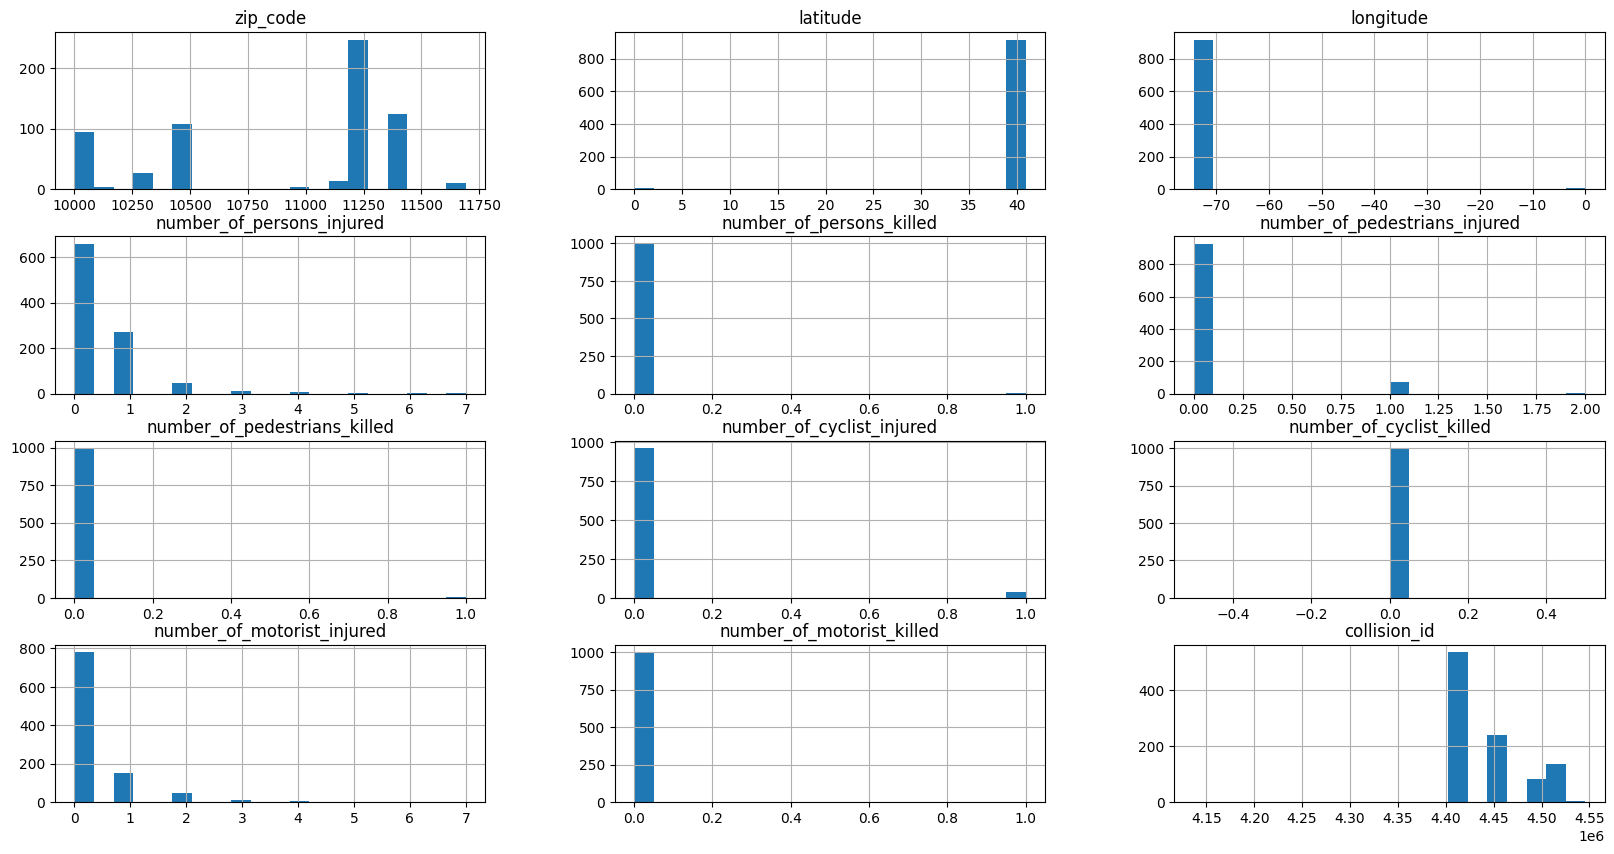

In [19]:
df.hist(bins=20,figsize=(20,10))

<Axes: xlabel='number_of_persons_injured', ylabel='number_of_persons_killed'>

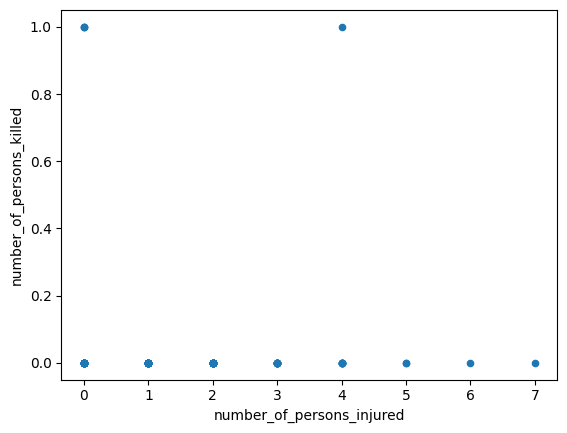

In [24]:
df[['number_of_persons_injured','number_of_persons_killed']].plot( kind='scatter', x='number_of_persons_injured', y='number_of_persons_killed')

<Axes: xlabel='borough'>

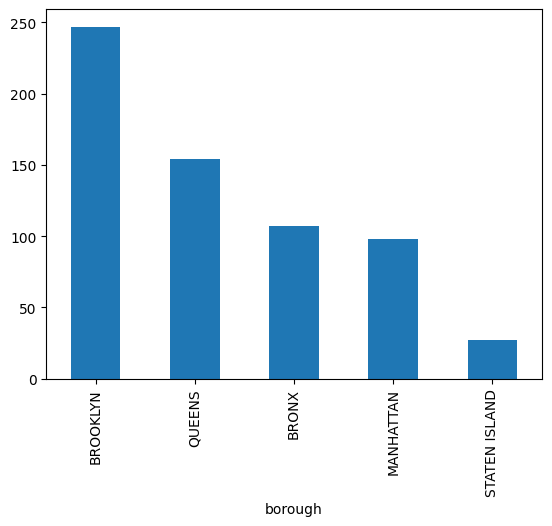

In [25]:
df['borough'].value_counts().plot(kind='bar')

In [26]:
grouped_data = df.groupby('borough')[['number_of_persons_injured','number_of_persons_killed']].mean()

In [27]:
grouped_data

,number_of_persons_injured,number_of_persons_killed
borough,,
BRONX,0.420561,0.000000
BROOKLYN,0.473684,0.004049
MANHATTAN,0.408163,0.000000
QUEENS,0.474026,0.000000
STATEN ISLAND,0.629630,0.000000


<Axes: title={'center': 'Number of Injuries'}, xlabel='borough'>

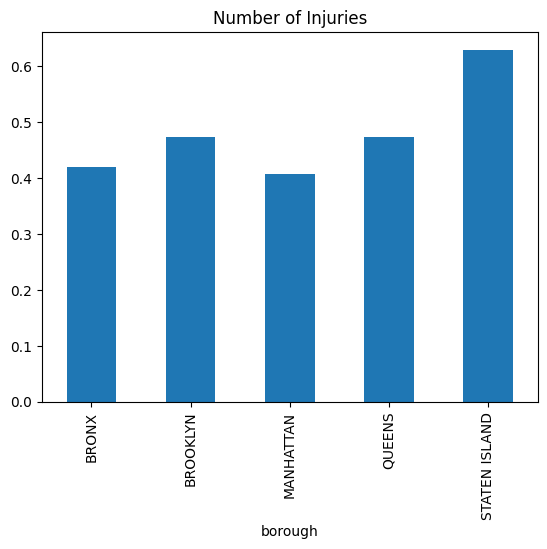

In [28]:
grouped_data['number_of_persons_injured'].plot(kind='bar', title = 'Number of Injuries')

<Axes: title={'center': 'Number of Deaths'}, xlabel='borough'>

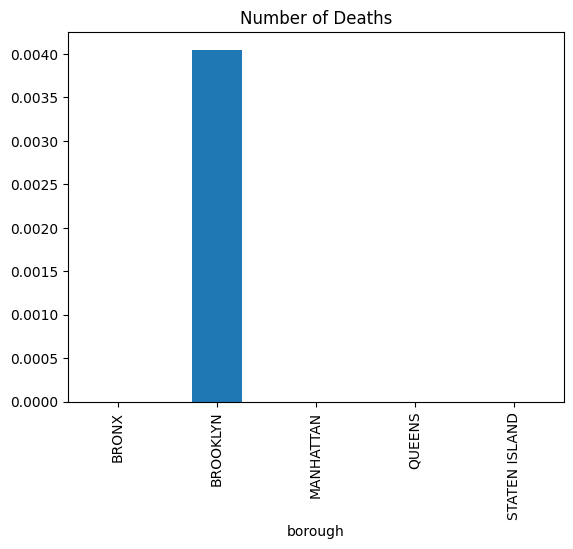

In [29]:
grouped_data['number_of_persons_killed'].plot(kind='bar', title = 'Number of Deaths')

In [30]:
date_grouped = df.groupby('crash_date')['crash_date'].count()

In [31]:
date_grouped

crash_date
2016-04-16T00:00:00.000     1
2019-05-21T00:00:00.000     1
2020-01-21T00:00:00.000     1
2020-04-15T00:00:00.000     1
2021-02-26T00:00:00.000     1
                           ..
2022-04-20T00:00:00.000     1
2022-04-22T00:00:00.000     2
2022-04-24T00:00:00.000    19
2022-06-29T00:00:00.000     2
2022-07-12T00:00:00.000     1
Name: crash_date, Length: 92, dtype: int64

<Axes: xlabel='crash_date'>

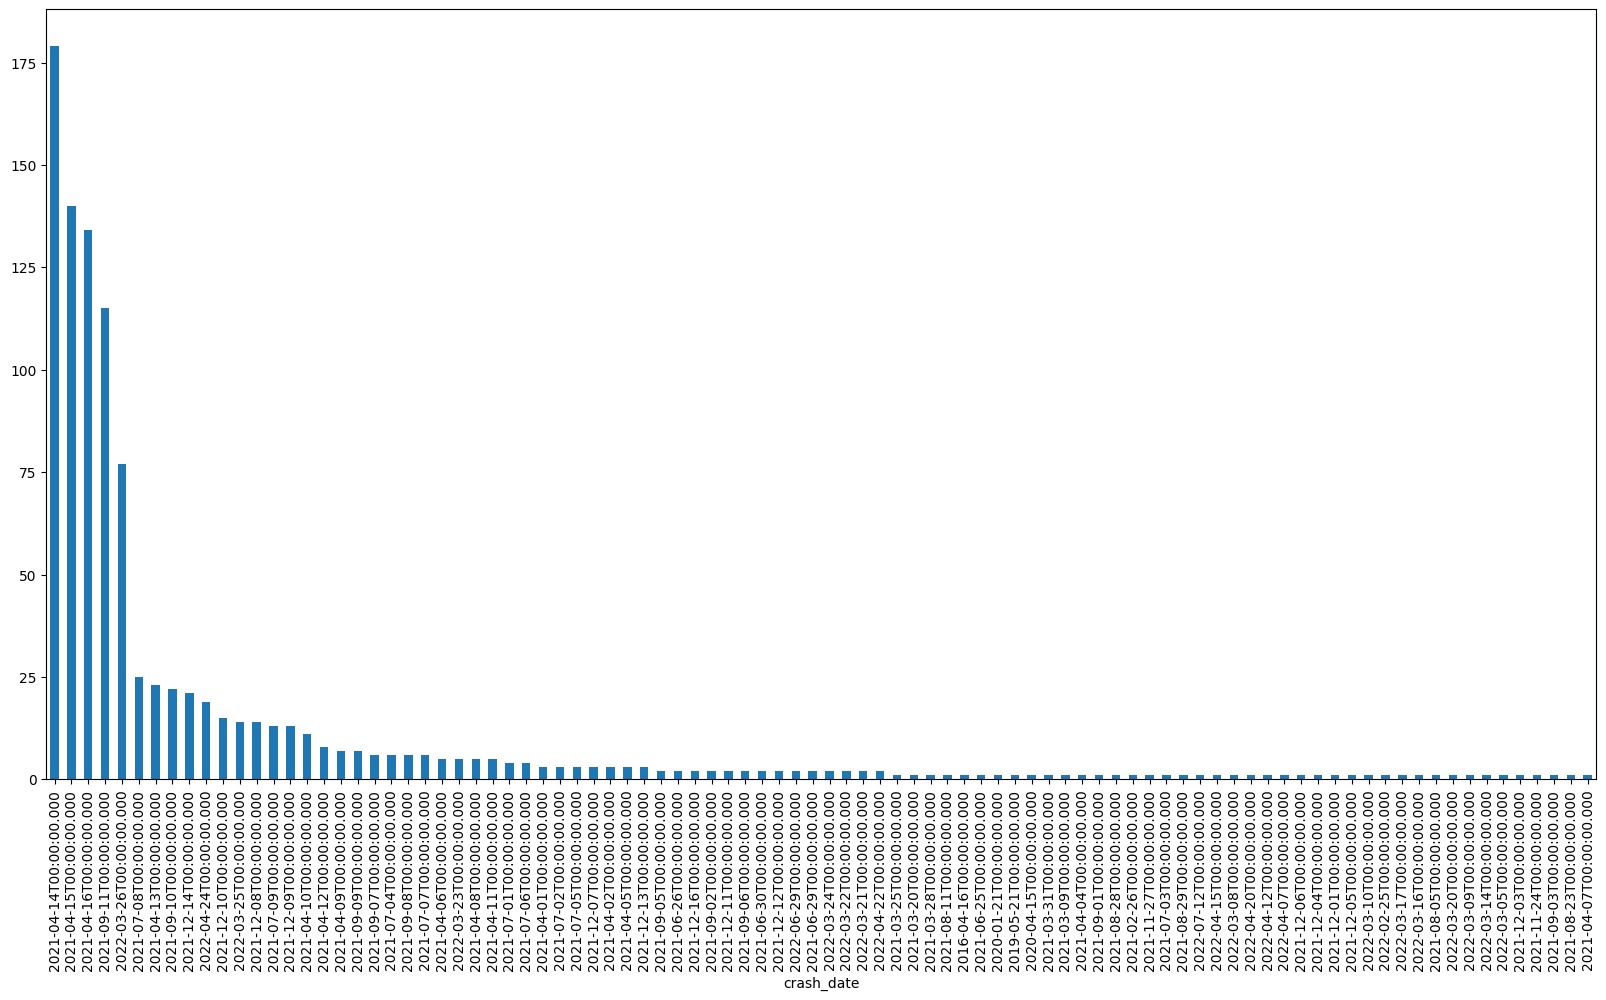

In [38]:
df['crash_date'].value_counts().plot(kind='bar',figsize=(20,10))